In [1]:
%cd ../..

/home/eli/AnacondaProjects/epych


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import collections
import glob
import functools
import logging
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import quantities as pq

import epych
from epych.statistics import alignment

In [4]:
%matplotlib inline

In [5]:
logging.basicConfig(level=logging.INFO)

In [6]:
CONDITIONS = ["go_gloexp", "gonaive", "go_seqctl", "lo_gloexp", "lonaive", "lo_rndctl", "igo_seqctl"]
PRETRIAL_SECONDS = 0.5
POSTTRIAL_SECONDS = 0.5

In [7]:
NWB_SUBJECTS = glob.glob('/mnt/data/DRAFT/000253/sub-*/')

In [8]:
PILOT_FILES = []

In [9]:
aligner = epych.statistics.alignment.AlignmentSummary.unpickle("/mnt/data/DRAFT/000253/visual_alignment")

In [10]:
def visual_align(signal):
    return signal.select_channels(["VIS" in loc for loc in signal.channels.location]).median_filter()

In [11]:
ADAPTED_ONSET = pq.Quantity(-1.0) * pq.second
ADAPTED_OFFSET = pq.Quantity(-0.5) * pq.second
ODDBALL_ONSET = pq.Quantity(-1.9017372477960602e-14) * pq.second
ODDBALL_OFFSET = pq.Quantity(0.5004545430388676) * pq.second
OFFSET = pq.Quantity(0.25) * pq.second
EVENTS = {
    "Onset": (ODDBALL_ONSET.magnitude, 'lightgreen'),
    "Offset": (ODDBALL_OFFSET.magnitude, 'red'),
}

In [12]:
def trial_lfps(cond):
    lfps = epych.recording.Sampling.unpickle("/mnt/data/DRAFT/000253/grandcat_%s" % cond)
    for sig in lfps.signals.values():
        sig._data = (sig.data * pq.units.volt).rescale('mV')
        sig._timestamps = sig._timestamps * pq.second
        sig._dt = sig._dt * pq.second
    logging.info("Loaded LFPs for condition %s" % cond)
    return lfps

In [13]:
subtractions = {}

In [14]:
for cond in CONDITIONS:
    if os.path.exists("/mnt/data/DRAFT/000253/grandcat_4-3_%s" % cond):
        subtractions[cond] = epych.recording.Sampling.unpickle("/mnt/data/DRAFT/000253/grandcat_4-3_%s" % cond)
    else:
        trials = trial_lfps(cond)
        subtracted = {k: v[(ODDBALL_ONSET - OFFSET).magnitude:(ODDBALL_OFFSET + OFFSET).magnitude] -
                         v[(ADAPTED_ONSET - OFFSET).magnitude:(ADAPTED_OFFSET + OFFSET).magnitude]
                      for k, v in trials.signals.items()}
        for k, v in subtracted.items():
            subtracted[k] = v.shift_timestamps(-OFFSET)
        subtraction = epych.recording.Sampling(epych.recording.empty_intervals(), trials.trials, trials.units,
                                               **subtracted)
        subtractions[cond] = subtraction
        subtractions[cond].pickle("/mnt/data/DRAFT/000253/grandcat_4-3_%s" % cond)
        del trials
    logging.info("Subtracted adapted from oddball trials in LFPs for condition %s" % cond)

INFO:root:Subtracted adapted from oddball trials in LFPs for condition go_gloexp
INFO:root:Subtracted adapted from oddball trials in LFPs for condition gonaive
INFO:root:Subtracted adapted from oddball trials in LFPs for condition go_seqctl
INFO:root:Subtracted adapted from oddball trials in LFPs for condition lo_gloexp
INFO:root:Subtracted adapted from oddball trials in LFPs for condition lonaive
INFO:root:Subtracted adapted from oddball trials in LFPs for condition lo_rndctl
INFO:root:Subtracted adapted from oddball trials in LFPs for condition igo_seqctl


In [15]:
anatomical_areas = ['VISp', 'VISl', 'VISrl', 'VISal', 'VISpm', 'VISam']

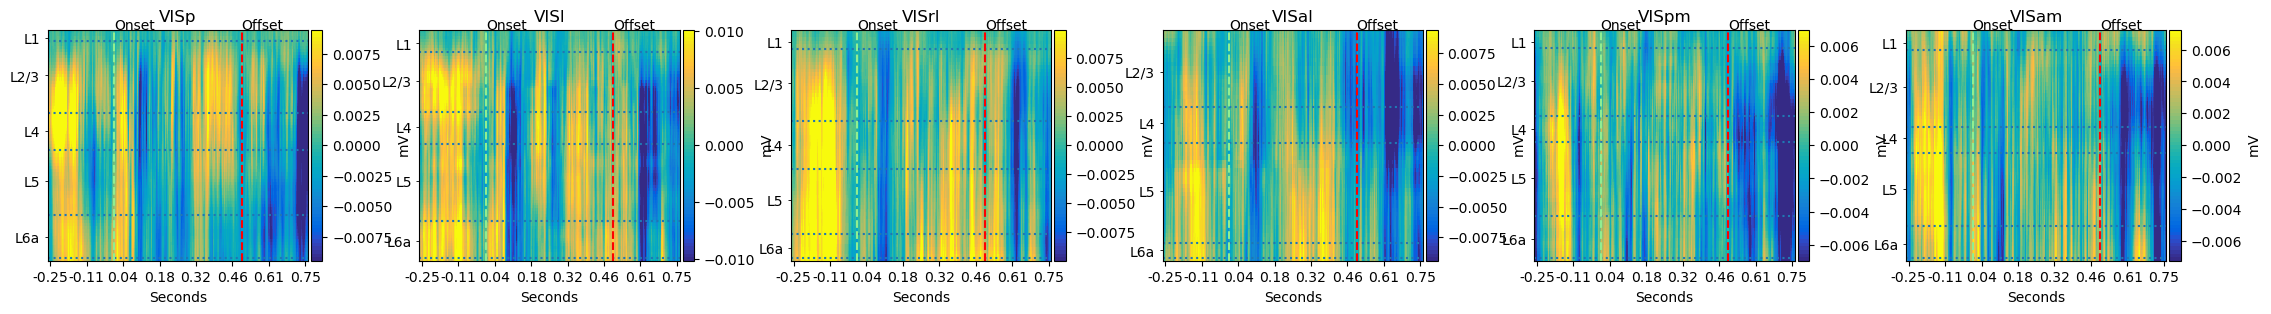

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]


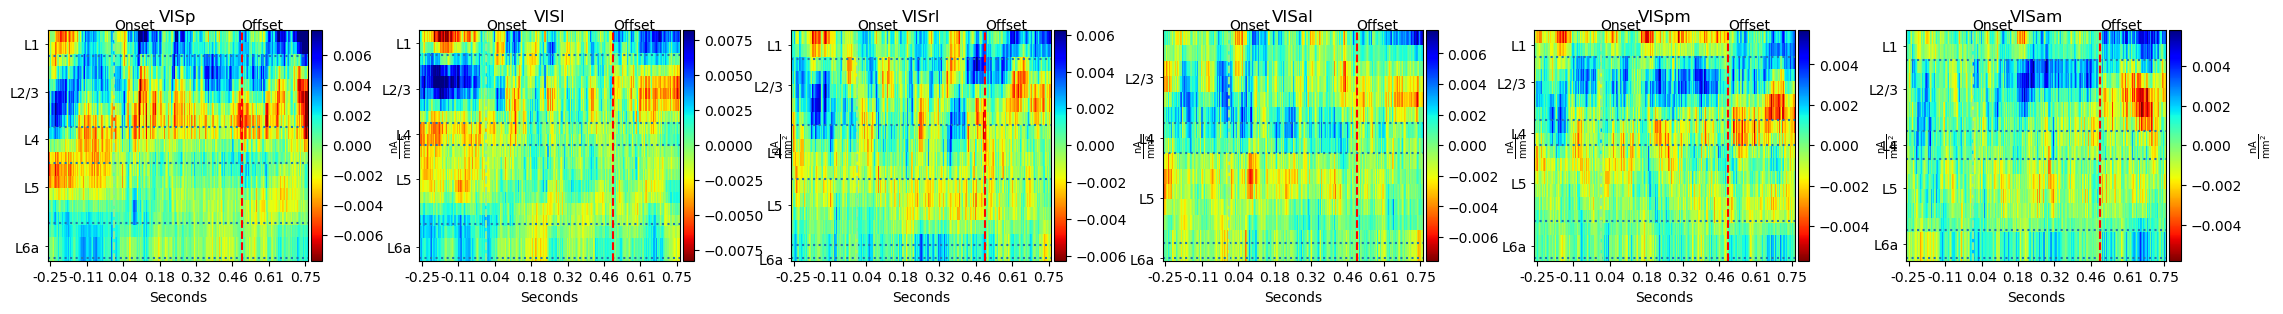

INFO:root:Plotted inner-subtraction LFPs, CSDs for condition go_gloexp


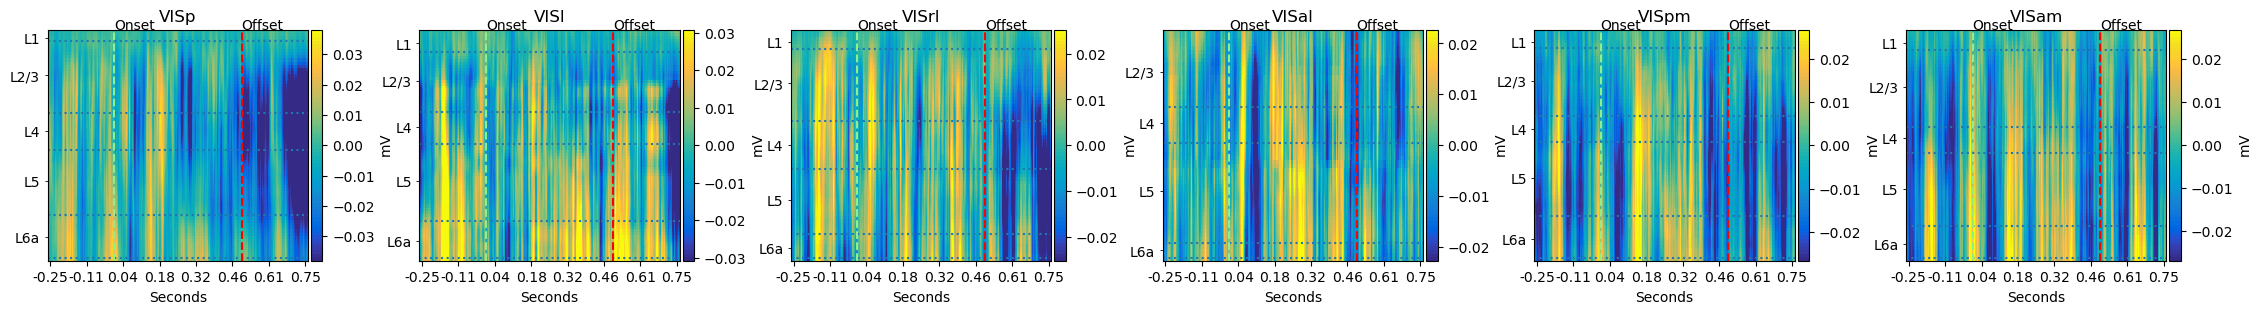

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]


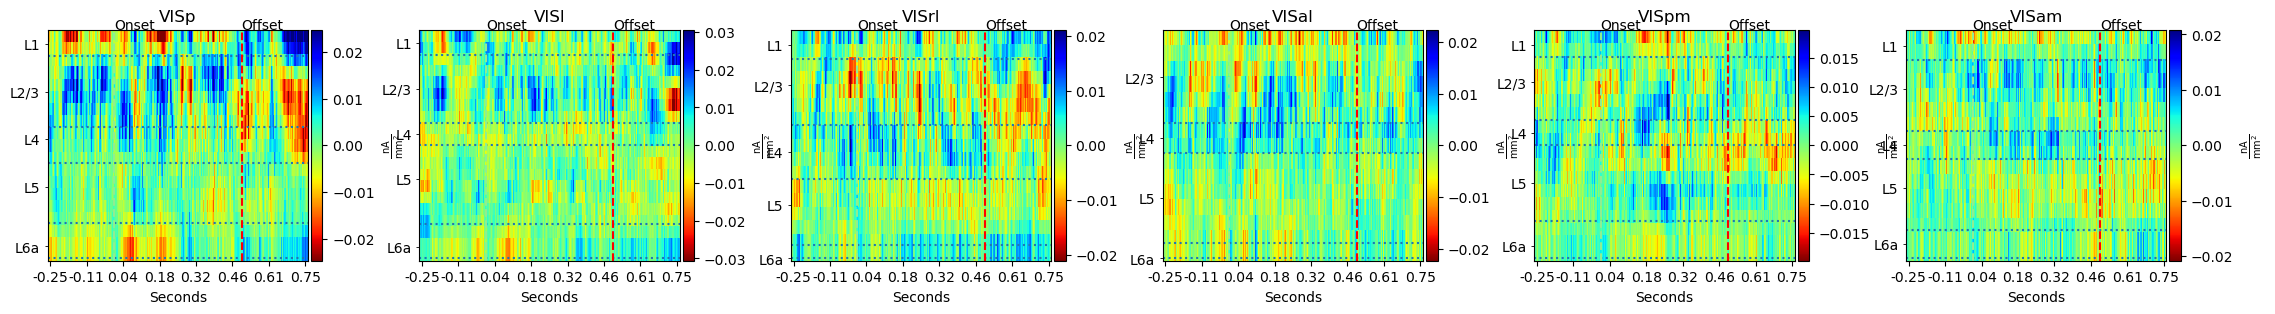

INFO:root:Plotted inner-subtraction LFPs, CSDs for condition gonaive


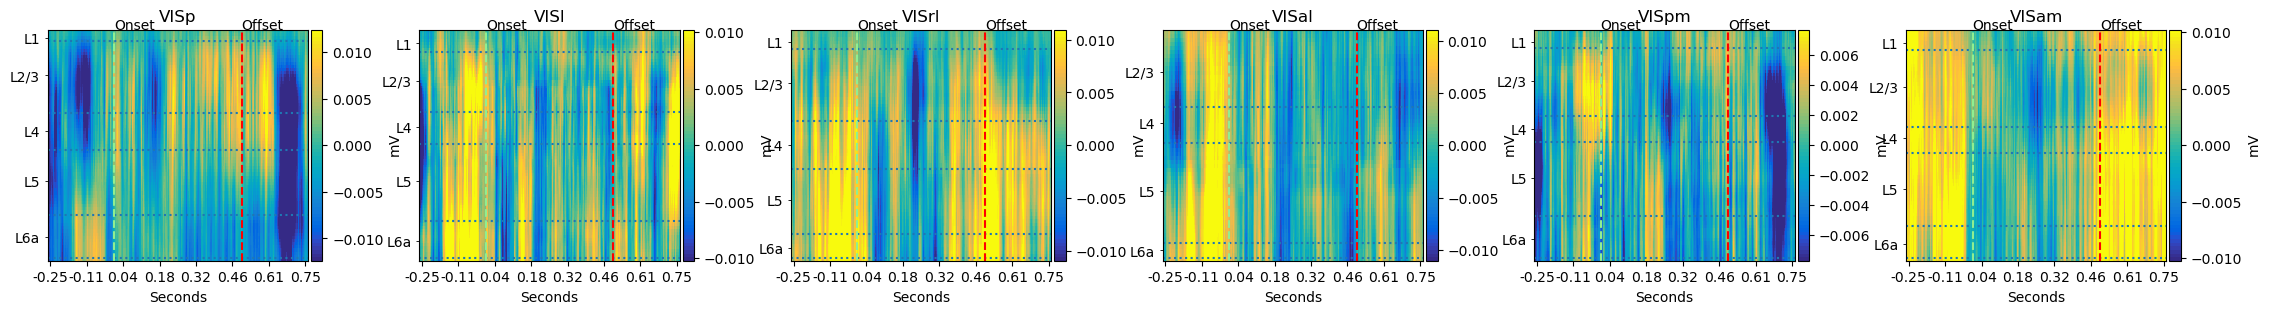

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]


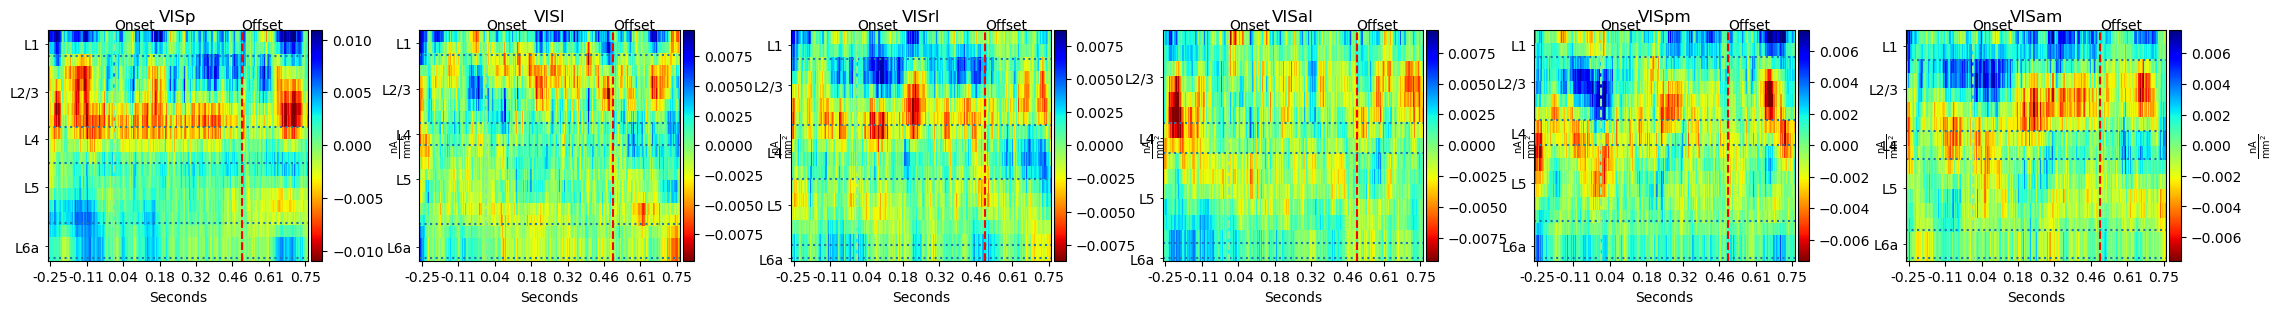

INFO:root:Plotted inner-subtraction LFPs, CSDs for condition go_seqctl


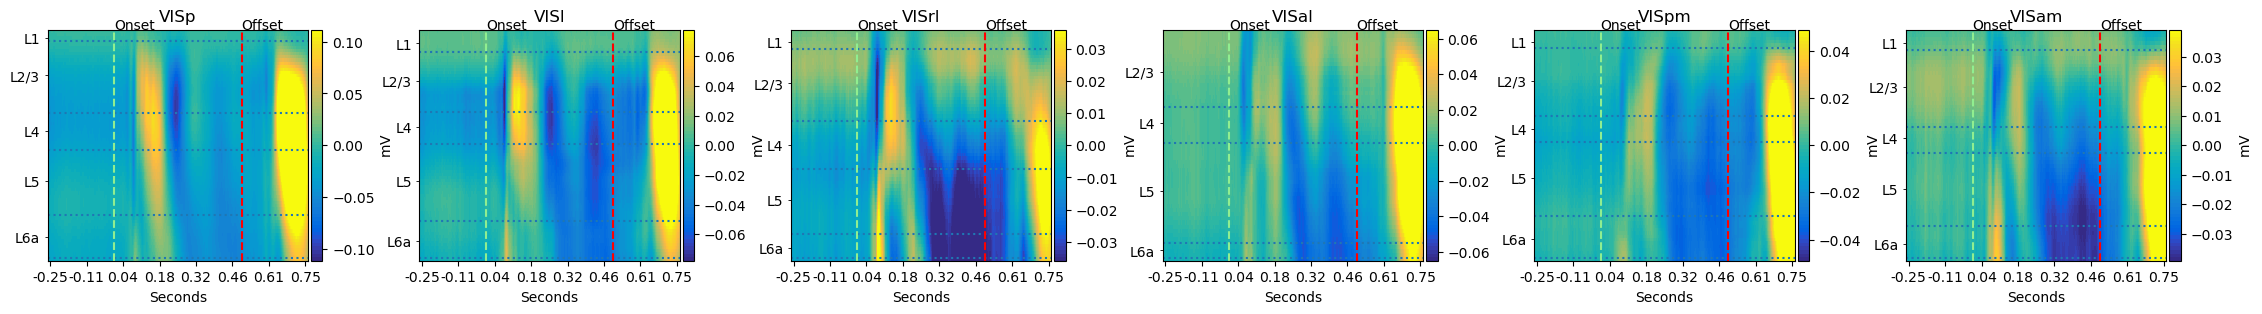

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]


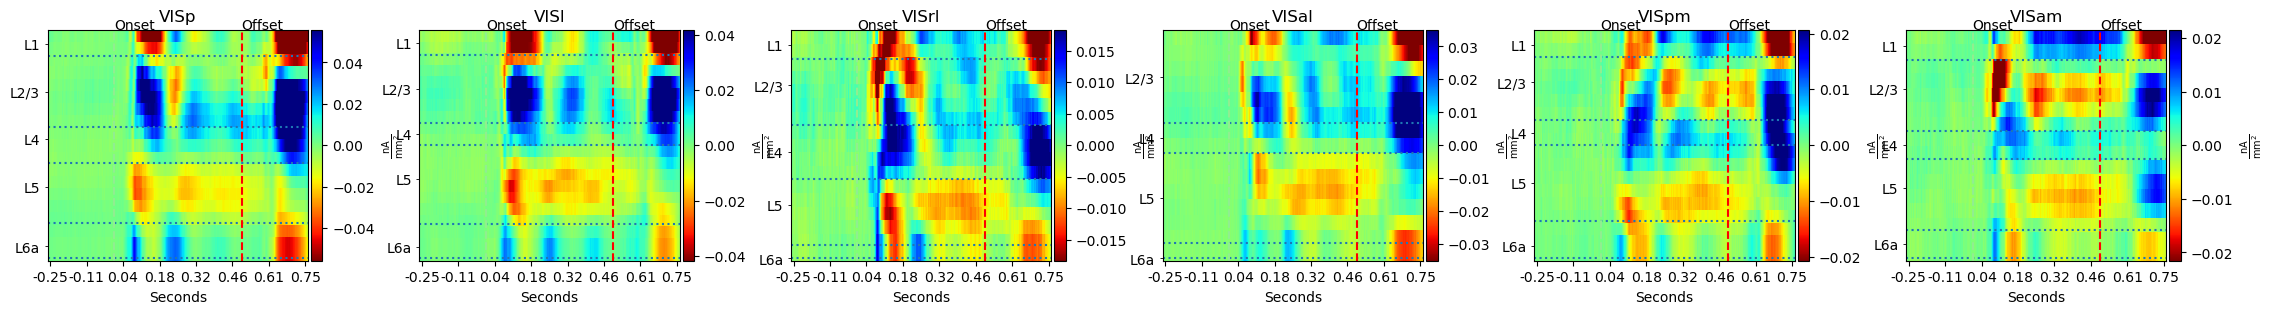

INFO:root:Plotted inner-subtraction LFPs, CSDs for condition lo_gloexp


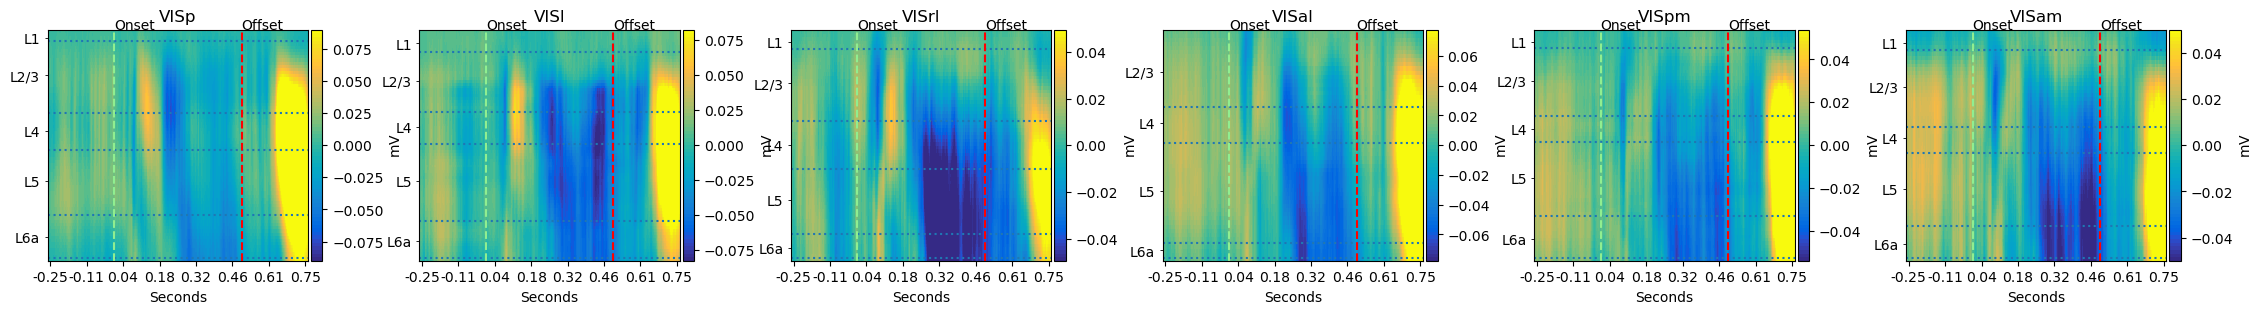

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]


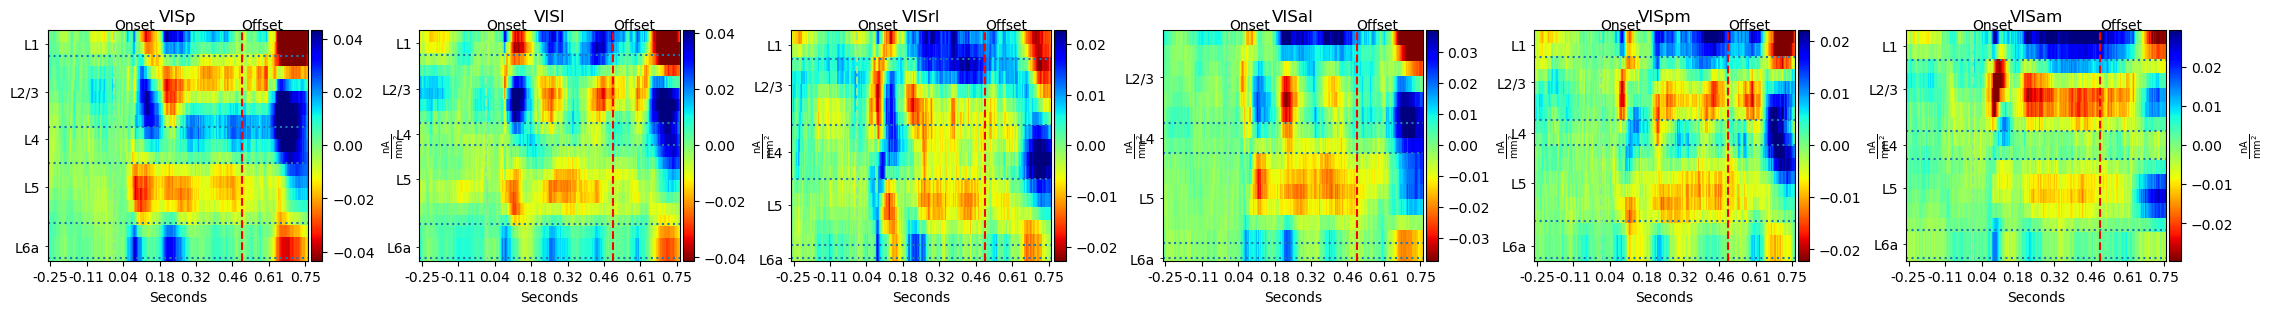

INFO:root:Plotted inner-subtraction LFPs, CSDs for condition lonaive


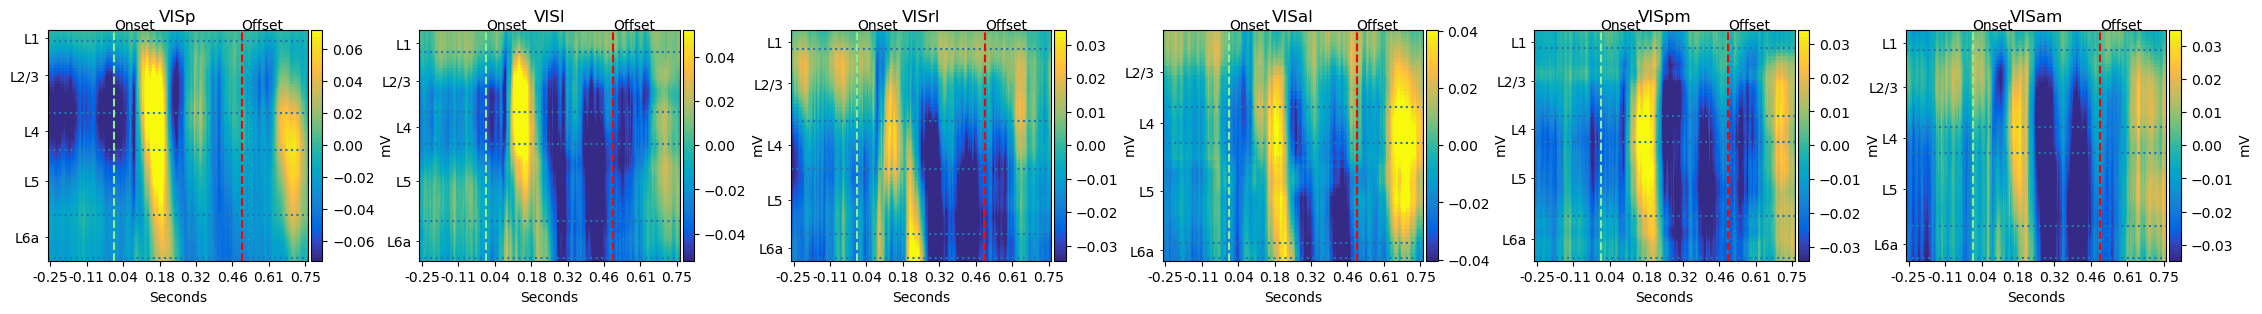

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]


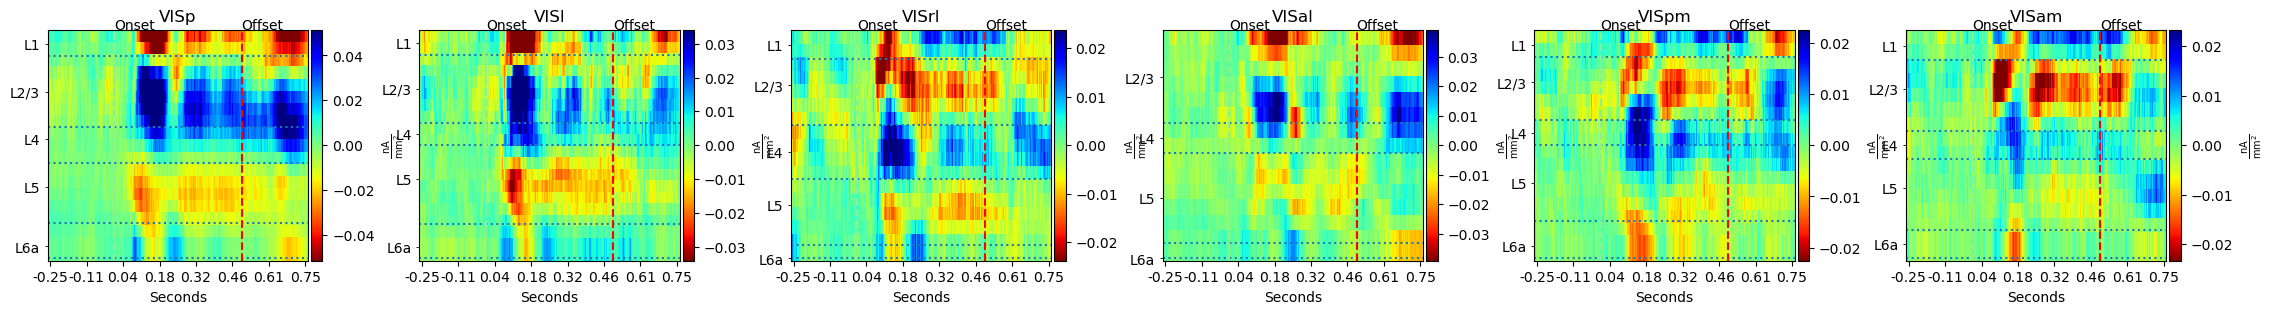

INFO:root:Plotted inner-subtraction LFPs, CSDs for condition lo_rndctl


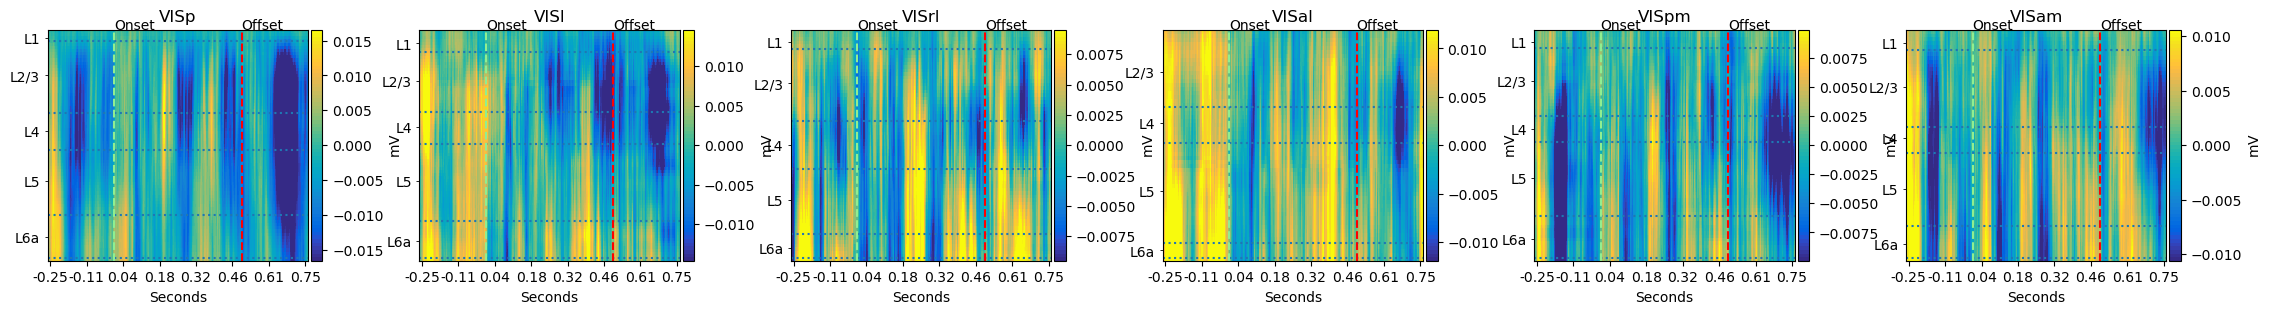

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]


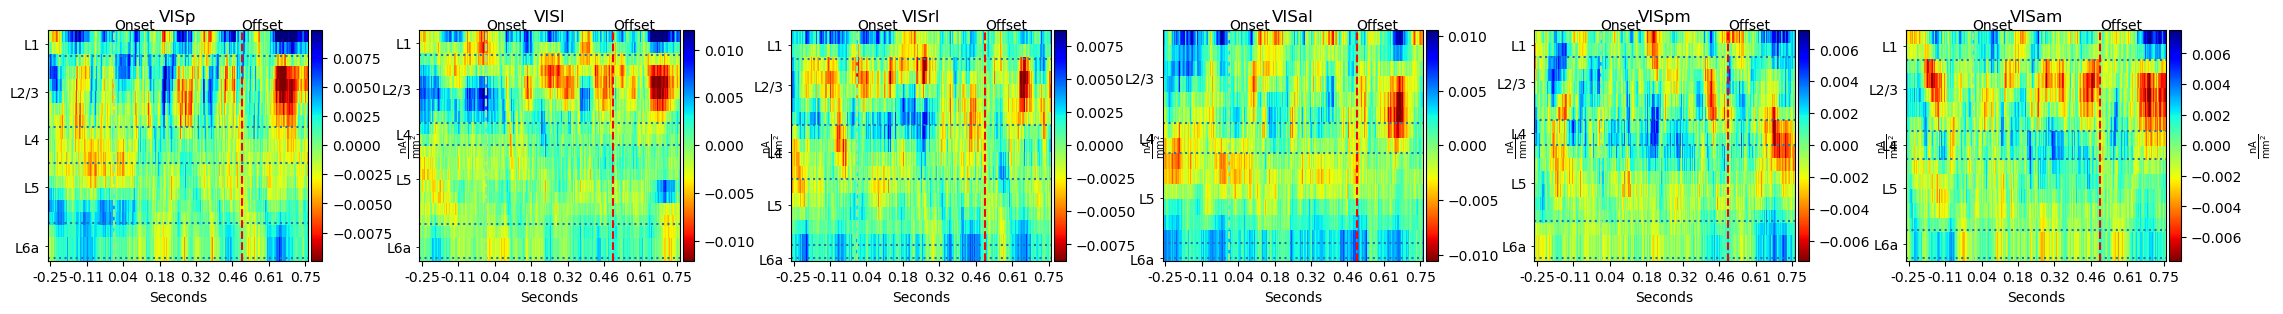

INFO:root:Plotted inner-subtraction LFPs, CSDs for condition igo_seqctl


In [16]:
for cond in CONDITIONS:
    erp = subtractions[cond].erp()
    erp.baseline_correct(0, OFFSET.magnitude).plot(signals=anatomical_areas, **EVENTS)

    csd = erp.smap(lambda sig: sig.median_filter().downsample(4).current_source_density(depth_column="vertical")).erp()
    for sig in csd.signals.values():
        sig._data = sig.data.rescale('nA / mm**2')
    csd.plot(signals=anatomical_areas, **EVENTS, cmap="jet_r")
    logging.info("Plotted inner-subtraction LFPs, CSDs for condition %s" % cond)